### Importación de librerías

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

### Importación de datos



In [22]:

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Exploración inicial de los dataframes

En esta fase se realiza una exploración de los datos contenidos en cada uno de los dataframes, con el objetivo de caracterizar las variables, ver valores nulos o faltantes, detectar inconsistencias en la presentación de los datos, entre otros.

#### Verificación de tipo de datos y valores nulos:

In [23]:
# Tipo de datos en el datafarme tienda:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [24]:
# Tipo de datos en el datafarme tienda2:
tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [25]:
# Tipo de datos en el datafarme tienda3:
tienda3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [26]:
# Tipo de datos en el datafarme tienda4:
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categoría del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de envío          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificación            2358 non-null   int64  
 8   Método de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes presentan una estructura similar.</li>
    <li> Los dataframes de tienda, tienda2 y tienda3 tienen unas dimensiones de 2359 filas y 12 columnas.</li>
    <li> El dataframe tienda4 tiene una dimensión de 2358 filas y 12 columnas.</li>
    <li> Ninguno de los dataframes tiene valores nulos.</li>
    <li> La columna 'Fecha de compra' tiene datos tipo str.</li>  
  </ul>
</div>


#### Verificación de variables categóricas:

In [79]:
# Verificación de consistencia de escritura de las categorías de 'Producto' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda1':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

tiendas_productos = {
    nombre:sorted(df['Producto'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, productos in tiendas_productos.items():
    print(f'Productos del dataframe {nombre}: ')
    print(productos)
    print('---')

Productos del dataframe Tienda1: 
['Ajedrez de madera', 'Armario', 'Asistente virtual', 'Auriculares', 'Auriculares con micrófono', 'Balón de baloncesto', 'Balón de voleibol', 'Batería', 'Bicicleta', 'Bloques de construcción', 'Cama box', 'Cama king', 'Carrito de control remoto', 'Celular ABXY', 'Ciencia de datos con Python', 'Cubertería', 'Cubo mágico 8x8', 'Cuerda para saltar', 'Dashboards con Power BI', 'Dinosaurio Rex', 'Estufa', 'Guitarra acústica', 'Guitarra eléctrica', 'Impresora', 'Iniciando en programación', 'Iphone 15', 'Juego de mesa', 'Kit de bancas', 'Lavadora de ropa', 'Lavavajillas', 'Mesa de centro', 'Mesa de comedor', 'Mesa de noche', 'Microondas', 'Mochila', 'Modelado predictivo', 'Muñeca bebé', 'Olla de presión', 'Pandereta', 'Refrigerador', 'Secadora de ropa', 'Set de ollas', 'Set de vasos', 'Silla de oficina', 'Sillón', 'Smart TV', 'Smartwatch', 'Sofá reclinable', 'TV LED UHD 4K', 'Tablet ABXY', 'Vaso térmico']
---
Productos del dataframe Tienda2: 
['Ajedrez de mad

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Producto'.</li>
    <li> No hay diferencias particulares en los productos que venden cada una de las tiendas. </li> 
  </ul>
</div>

In [80]:
# Verificación de consistencia de escritura de las categorías de 'Categoría del Producto' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda1':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

tiendas_cat_prod = {
    nombre:sorted(df['Categoría del Producto'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, categoria in tiendas_cat_prod.items():
    print(f'Categorías del Producto del dataframe {nombre}: ')
    print(categoria)
    print('---')

Categorías del Producto del dataframe Tienda1: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto del dataframe Tienda2: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto del dataframe Tienda3: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto del dataframe Tienda4: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Categoría del Producto'.</li>
    <li> No hay diferencias particulares en las categorías de productos que venden cada una de las tiendas. </li> 
  </ul>
</div>

In [81]:
# Verificación de consistencia de escritura de las categorías de 'Vendedor' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda1':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

tiendas_vendedores = {
    nombre:sorted(df['Vendedor'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, vendedor in tiendas_vendedores.items():
    print(f'Vendedores del dataframe {nombre}: ')
    print(vendedor)
    print('---')

Vendedores del dataframe Tienda1: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores del dataframe Tienda2: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores del dataframe Tienda3: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores del dataframe Tienda4: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernand

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Vendedor'.</li>
    <li> El mismo personal rota por las 4 tiendas. </li> 
  </ul>
</div>

In [82]:
# Verificación de consistencia de escritura de las categorías de 'Lugar de Compra' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda1':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

tiendas_lugares = {
    nombre:sorted(df['Lugar de Compra'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, lugar in tiendas_lugares.items():
    print(f'Lugares de compra del dataframe {nombre}: ')
    print(lugar)
    print('---')

Lugares de compra del dataframe Tienda1: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra del dataframe Tienda2: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra del dataframe Tienda3: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra del dataframe Tienda4: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiv

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Lugar de Compra'.</li>
    <li> Las 4 tiendas realizan envíos a las mismas ciudades. </li> 
  </ul>
</div>

In [83]:
# Verificación de consistencia de escritura de las categorías de 'Método de pago' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda1':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

tiendas_metodo_pago = {
    nombre:sorted(df['Método de pago'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, metodo in tiendas_metodo_pago.items():
    print(f'Los métodos de pago considerados en el dataframe {nombre} son: ')
    print(metodo)
    print('---')

Los métodos de pago considerados en el dataframe Tienda1 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en el dataframe Tienda2 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en el dataframe Tienda3 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en el dataframe Tienda4 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Método de pago'.</li>
    <li> Las 4 tiendas aceptan los mismos métodos de pago. </li> 
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones de la exploración inicial
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li>Todas las tiendas tienen características similares en cuanto a tipo de productos ofrecidos, lugares de venta, medios de pago aceptados y personal. No hay una característica diferenciadora que, a primera vista, haga destacar una tienda sobre otra. </li>
        <li>La tienda4 ha realizado 1 venta menos (2358 registros) que las demás tiendas (2359 registros).</li>
        <li>Para realizar el análsis de la evolución de ventas en el tiempo es necesario convertir la columna 'Fecha de Compra' de tipo str (object) a tipo fecha (datetime).</li>
        <li>Las variables categóricas de los dataframes no presentan inconsistencias de escritura.</li>
        <li>No se observan valores nulos o faltantes en ninguno de los dataframes.</li>
    </ul>
  </div>
</div>

### Limpieza de datos

En esta fase sólo se convertirá la columna 'Fecha de Compra' de tipo str a tipo date para permitir un análisis posterior.

In [84]:
# Cambio de tipo de dato de la columna 'Fecha de Compra' de los dataframes tienda, tienda2, tienda3 y tienda4.
tiendas_df = {'Tienda1':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

for nombre, df in tiendas_df.items():
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')
    print(f'El tipo de dato de la columna "Fecha de Compra" del dataframe {nombre} es: ')
    print(f'{df["Fecha de Compra"].dtype.name}')
    print('---')

El tipo de dato de la columna "Fecha de Compra" del dataframe Tienda1 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" del dataframe Tienda2 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" del dataframe Tienda3 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" del dataframe Tienda4 es: 
datetime64[ns]
---


<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones de la limpieza de datos
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Se cambió satisfactoriamente en los 4 dataframes el tipo de dato de la columna 'Fecha de Compra' de tipo str a tipo date.  </li>
        <li> Con los dataframes explorados y limpios, se procede a la fase de análisis.</li>
    </ul>
  </div>
</div>

### Análisis de datos

#### Análisis de la facturación:



In [86]:
# Facturación total del df tienda
tiendas_df = {'Tienda1':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}

for nombre, df in tiendas_df.items():
    total_ventas = float(df['Precio'].sum())
    print(f'El total de ventas del dataframe {nombre} es {total_ventas}')
    print('---')


El total de ventas del dataframe Tienda1 es 1150880400.0
---
El total de ventas del dataframe Tienda2 es 1116343500.0
---
El total de ventas del dataframe Tienda3 es 1098019600.0
---
El total de ventas del dataframe Tienda4 es 1038375700.0
---


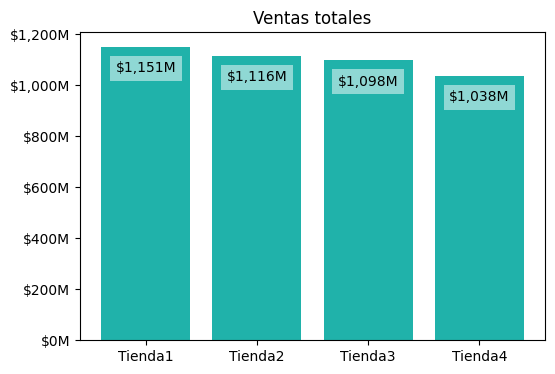

In [87]:
tiendas_df = {'Tienda1':tienda, 'Tienda2':tienda2, 'Tienda3':tienda3, 'Tienda4':tienda4}
totales_por_tienda = {}

for nombre, df in tiendas_df.items():
    ventas_totales = df['total_ventas'] = df['Precio'].sum()
    totales_por_tienda[nombre] = ventas_totales

x = list(totales_por_tienda.keys())
y = list(totales_por_tienda.values())

def millones(x, pos=None):
    return f'${x/1_000_000:,.0f}M'


fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x, y, color = 'lightseagreen')
ax.yaxis.set_major_formatter(FuncFormatter(millones))
ax.set_title("Ventas totales")

for i, v in enumerate(y):
    ax.text(i, v-100_000_000, millones(v), ha='center', bbox = {'facecolor':'white', 'alpha':0.5, 'edgecolor':'None'})

plt.show()


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Las 4 tiendas han tenido ventas totales por más de 1000 millones.</li>
    <li> La tienda 1 ha reportado más ventas totales, por un valor de 1151 millones. </li> 
  </ul>
</div>

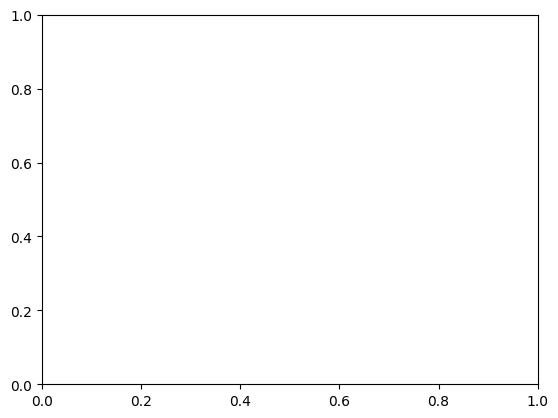

In [ ]:
# Ventas totales por año
# Pivot table mostrando las tiendas, las ventas por año y las ventas totales

In [37]:
# Fechas o temporadas con mayor volumen de compras.

#### Ventas por categoría

In [38]:
# Facturación total por categoría


#### Calificación promedio de la tienda


#### Productos más y menos vendidos

#### Envío promedio por tienda

In [39]:
# Análisis del costo de envío a ciudades y el volumen de ventas. Retorno de inversión.

In [ ]:
# Mapa de calor de ventas en ciudades / departamentos

### Recomendaciones